In [7]:
import pandas as pd
import datetime
from pythainlp.util.date import thai_strptime
import seaborn as sns
import matplotlib

In [2]:
loan_df = pd.read_csv("./output/loan-interest-rates.csv",index_col=False)
deposit_df = pd.read_csv("./output/deposit-interest-rates.csv",index_col=False)

In [3]:
def convert_date(txt):
    return thai_strptime(txt,'%d %B %Y')

In [4]:
loan_df['date'] = loan_df['วันที่'].apply(convert_date)
deposit_df['date'] = deposit_df['วันที่'].apply(convert_date)

/home/phakphumv/Projects/2023/Q1-finsurgent/th-bank-historical-interest-rates/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/phakphumv/Projects/2023/Q1-finsurgent/th-bank-historical-interest-rates/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/phakphumv/Projects/2023/Q1-finsurgent/th-bank-historical-interest-rates/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 3640 (\N{THAI CHARACTER SARA U}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/phakphumv/Projects/2023/Q1-finsurgent/th-bank-historical-interest-rates/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 3591 (\N{THAI CHARACTER NGO NGU}) missing from current font.


/home/phakphumv/Projects/2023/Q1-finsurgent/th-bank-historical-interest-rates/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/phakphumv/Projects/2023/Q1-finsurgent/th-bank-historical-interest-rates/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/phakphumv/Projects/2023/Q1-finsurgent/th-bank-historical-interest-rates/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 3615 (\N{THAI CHARACTER FO FAN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/phakphumv/Projects/2023/Q1-finsurgent/th-bank-historical-interest-rates/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 3592 (\N{THAI CHARACTER CHO CHAN}) missing from current

KeyError: 'y'

/home/phakphumv/Projects/2023/Q1-finsurgent/th-bank-historical-interest-rates/venv/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from current font.
  func(*args, **kwargs)
/home/phakphumv/Projects/2023/Q1-finsurgent/th-bank-historical-interest-rates/venv/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from current font.
  func(*args, **kwargs)
/home/phakphumv/Projects/2023/Q1-finsurgent/th-bank-historical-interest-rates/venv/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 3640 (\N{THAI CHARACTER SARA U}) missing from current font.
  func(*args, **kwargs)
/home/phakphumv/Projects/2023/Q1-finsurgent/th-bank-historical-interest-rates/venv/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 3591 (\N{THAI CHARACTER NGO NGU}) missing from current font.
  func(*args, **kwargs)
/home/phakphumv/Projects/2023/Q

/home/phakphumv/Projects/2023/Q1-finsurgent/th-bank-historical-interest-rates/venv/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 3632 (\N{THAI CHARACTER SARA A}) missing from current font.
  func(*args, **kwargs)
/home/phakphumv/Projects/2023/Q1-finsurgent/th-bank-historical-interest-rates/venv/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 3611 (\N{THAI CHARACTER PO PLA}) missing from current font.
  func(*args, **kwargs)
/home/phakphumv/Projects/2023/Q1-finsurgent/th-bank-historical-interest-rates/venv/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 3630 (\N{THAI CHARACTER HO NOKHUK}) missing from current font.
  func(*args, **kwargs)
/home/phakphumv/Projects/2023/Q1-finsurgent/th-bank-historical-interest-rates/venv/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 3616 (\N{THAI CHARACTER PHO SAMPHAO}) missing from current font.
  func(*args, **kwargs)
/home/phakphumv/Projects

/home/phakphumv/Projects/2023/Q1-finsurgent/th-bank-historical-interest-rates/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/phakphumv/Projects/2023/Q1-finsurgent/th-bank-historical-interest-rates/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3649 (\N{THAI CHARACTER SARA AE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/phakphumv/Projects/2023/Q1-finsurgent/th-bank-historical-interest-rates/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/phakphumv/Projects/2023/Q1-finsurgent/th-bank-historical-interest-rates/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) mis

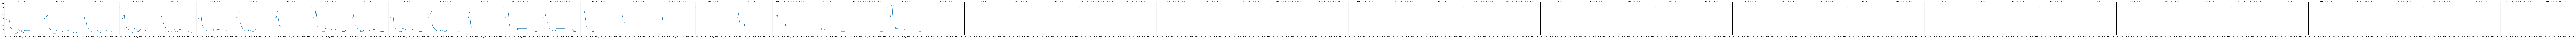

In [8]:
matplotlib.rcParams.update(
    {
        'font.family': 'serif',
    }
)

sns.relplot(
    data=loan_df, kind="line",
    x="date", y="MOR", col="bank",
)
